# Xarray Dataset Usage Example

#### The first thing we will do is import an Xarray dataset, call a file, set it equal to a variable while opening it, and view it's contents.

In [3]:
import xarray as xr #imports xarray

file_list = ["/home/hmartinezbuehrer1/hunter_folder/dec22-jan23_AR_hunter_prism.nc"] #setting the variable equal to a file

ds = xr.open_mfdataset(file_list) #opening the dataset and setting it equal to ds

ds

<xarray.Dataset>
Dimensions:  (time: 28, lat: 621, lon: 1405)
Coordinates:
  * lat      (lat) float64 24.04 24.08 24.12 24.17 ... 49.77 49.81 49.85 49.89
  * lon      (lon) float64 -125.0 -125.0 -124.9 -124.9 ... -66.54 -66.49 -66.45
  * time     (time) datetime64[ns] 2022-12-23 2022-12-24 ... 2023-01-19
Data variables:
    ppt      (time, lat, lon) float64 dask.array<chunksize=(28, 621, 1405), meta=np.ndarray>
Attributes:
    title:        PRISM Daily Data for 2022
    platform:     Grided Observations
    description:  PRISM Data on a 0.04 degree grid
    institution:  Iowa State University, Ames, IA, USA
    source:       Iowa Environmental Mesonet
    project_id:   IEM
    realization:  1
    Conventions:  CF-1.0
    contact:      Daryl Herzmann, akrherz@iastate.edu, 515-294-5978
    history:      04 January 2022 Generated
    comment:      No Comment at this time

#### The only variable in this dataset is accumulated precipitation for the day, and it has 3 coordinates, latitude, longitude, and time. We can pull this data using .sel. Since this variable has a time dimension, we need to set a time to pull. When we do, it will also show us the attributes for the data .

In [4]:
ppt = ds['ppt'] #This sets the variable "ppt" to the dataset variable ppt. We do this by calling the dataset ds and defining the variable we want to use.

precipitation = ppt.sel(time='2022-12-28') #This sets the variable "precipitation" to a specific time from ppt. In this case, We chose 28 December 2022

print(precipitation)

<xarray.DataArray 'ppt' (lat: 621, lon: 1405)>
dask.array<getitem, shape=(621, 1405), dtype=float64, chunksize=(621, 1405), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 24.04 24.08 24.12 24.17 ... 49.77 49.81 49.85 49.89
  * lon      (lon) float64 -125.0 -125.0 -124.9 -124.9 ... -66.54 -66.49 -66.45
    time     datetime64[ns] 2022-12-28
Attributes:
    units:          mm
    long_name:      Precipitation
    standard_name:  Precipitation
    description:    Precipitation accumulation for the day


#### With our variable defined and sliced, we can now use it to plot data. Using some basic cartopy functions that were talked about in the cartopy example, we can plot the data on the map.

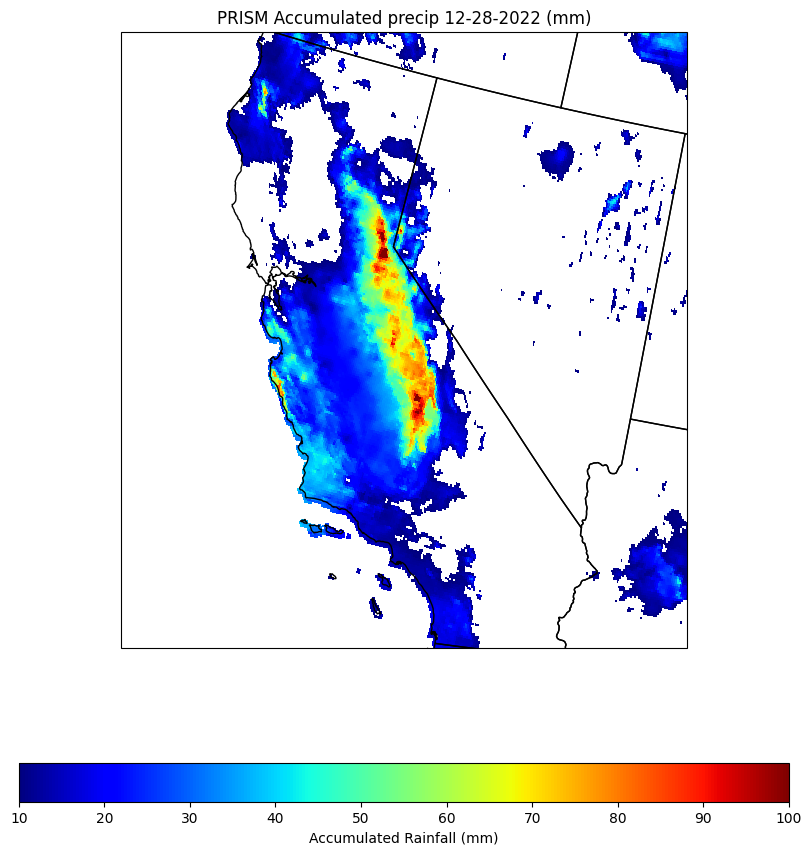

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5, 
                                                          standard_parallels=(29.5, 45.5)))
ax.set_extent([-124, -114, 33, 42])

levels = [10,20,30,40,50,60,70,80,90,100]

cmap = 'jet'
rainfall = plt.pcolormesh(ds.lon, ds.lat, precipitation, 
               transform=ccrs.PlateCarree(), cmap = cmap, vmin =10, vmax = 100)
ax.add_feature(cfeature.STATES)

cb = plt.colorbar(rainfall, orientation = "horizontal", fraction = 0.05, ticks = levels)

cmap = rainfall.get_cmap()
cmap.set_under('w')

cb.set_label("Accumulated Rainfall (mm)")

plt.title("PRISM Accumulated precip 12-28-2022 (mm)")

plt.show()


#### If we want, we can also convert the dataset to a another unit, such as inches, by simply using the conversion from one unit to the another on the variable that uses the data

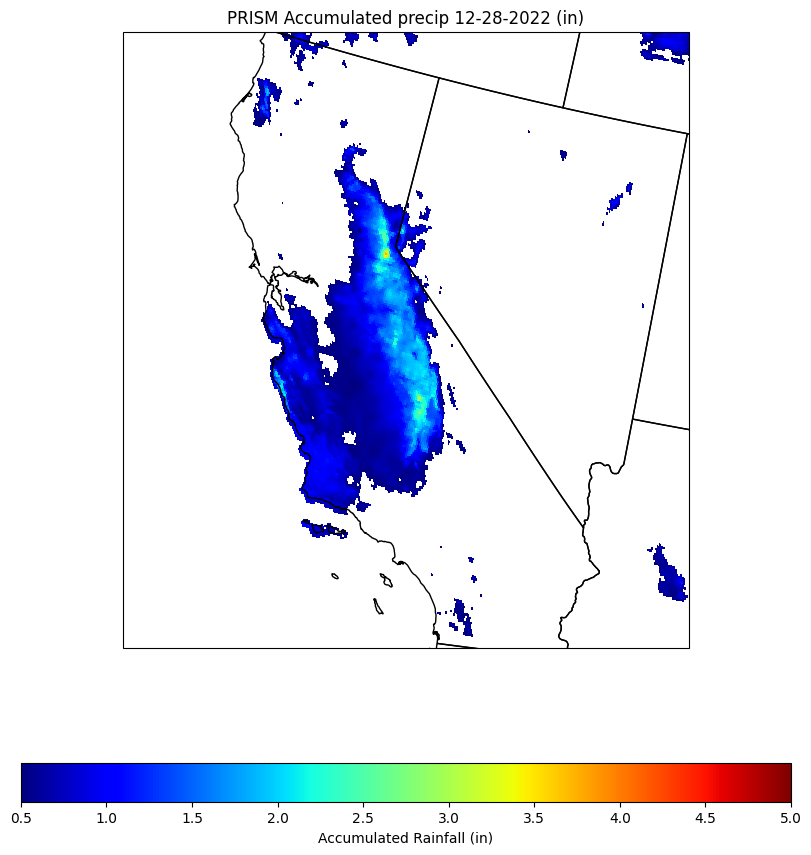

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5, 
                                                          standard_parallels=(29.5, 45.5))) 
ax.set_extent([-124, -114, 33, 42])

levels = [.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

cmap = 'jet'
rainfall = plt.pcolormesh(ds.lon, ds.lat, precipitation/39.37, 
               transform=ccrs.PlateCarree(), cmap = cmap, vmin =.5, vmax = 5) #precipitation is converted from mm to inches
ax.add_feature(cfeature.STATES)

cb = plt.colorbar(rainfall, orientation = "horizontal", fraction = 0.05, ticks = levels)

cmap = rainfall.get_cmap()
cmap.set_under('w')

cb.set_label("Accumulated Rainfall (in)")

plt.title("PRISM Accumulated precip 12-28-2022 (in)")

plt.show()